# Arrested Development: Understanding Success

Decision Support Systems for Industrial Engineers<br>
University of Central Florida
Dr. Ivan Garibay, Ramya Akula

#### Team Members Names:  Zachary Wieselthier, Laura Martin, Sean Worth, Ryan Nicholls



In [0]:
!pip install pystan

In [1]:
#Import Packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import shapiro #normallity test
from scipy.stats import mstats
from fbprophet import Prophet

#Import Data and Create Data Frame
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
link = 'https://drive.google.com/open?id=1f5EngQxCG08Ornpy97fyb74GXGLNdBJA' 
fluff, id = link.split('=')

# Dataset is now stored in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Arrested Development_Pub.csv')  
ad = pd.read_csv('Arrested Development_Pub.csv')
ad.head(4)


/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/discovery/v1/apis/drive/v2/rest
INFO:oauth2client.transport:Attempting refresh to obtain initial access_token
INFO:oauth2client.client:Refreshing access_token
INFO:googleapiclient.discovery:URL being requested: GET https://www

,ID,Title,url,Director,Writer,Original Air Date,Rating,Narrator,Michael,G.O.B.,...,Starla,Barry,Lucille 2,Ann,Steve Holt,Rebel,Kitty,Lupe,Annyong,Mort Meyers
0,1_1,Pier Pressure,https://arresteddevelopment.fandom.com/wiki/Tr...,Anthony Russo & Joe Russo,Mitchell Hurwitz,11/2/2003,8.3,25,114,39,...,0,0,1,0,1,0,0,0,0,0
1,1_2,Missing Kitty,https://arresteddevelopment.fandom.com/wiki/Tr...,Anthony Russo,Mitchell Hurwitz & John Levenstein,11/9/2003,8.6,30,94,30,...,0,0,0,0,1,0,20,1,3,0
2,1_3,"My Mother, the Car",https://arresteddevelopment.fandom.com/wiki/Tr...,Joe Russo,Mitchell Hurwitz & Richard Rosenstock,11/16/2003,8.2,25,84,34,...,0,0,12,0,1,0,0,0,0,0
3,1_4,Best Man for the Gob,https://arresteddevelopment.fandom.com/wiki/Tr...,Anthony Russo,Brad Copeland,11/23/2003,8.5,22,78,45,...,0,0,0,0,1,0,0,0,3,0


### Descriptive Statistics

In [0]:
#Calculate Mean
avg_rating = ad["Rating"].mean() 
#Calculate Median
med_rating = ad['Rating'].median() 
#Calculate total number of episodes
count_episodes = ad['ID'].count() 
#Print Results
print 'Descriptive Statistics'
print'======================================'
print 'Average Episode Rating =', ("%.2f" % avg_rating)
print 'Median Episode Rating =',  med_rating
print 'Total number of Episodes =', count_episodes
print''
print 'Normallity'
print'==================================='
stat, p = shapiro(ad['Rating'])
print 'p = ', p
if p<.05:
   print 'Failed Normallity Test'

Descriptive Statistics
Average Episode Rating = 8.46
Median Episode Rating = 8.5
Total number of Episodes = 66

Normallity
p =  0.00185590097681
Failed Normallity Test


The average episode rating is a 8.46, and the median is an 8.5.

Population size is 66 episodes.

The rating does not follow a normal distribution tested by the Shapiro Wilk test, resulting in a P value of .001 which is less than the alpha value of .05. 


###Histagram


Text(0.5,0,u'Rating')

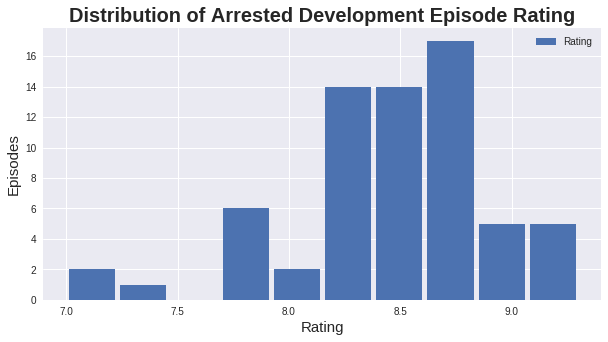

In [0]:
x = ad[['Rating']]

#Plotting graph
x.plot.hist(figsize=(10,5),grid=True, bins=10, rwidth=.9) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Distribution of Arrested Development Episode Rating', fontsize=20, fontweight='bold')
plt.ylabel('Episodes', fontsize=15)
plt.xlabel('Rating', fontsize=15)

By plotting a histogram to visualize the distribution of ratings per episode, we can observe that the data is slightly right, and follows a non standard distribution. Most of the episodes ratings fall between 8.2 and 8.9, while some ratings were as low as 7.0 and as high as 10.0. In descriptive statistics, the difference between the average and the median episode rating is another representation of normality. The difference is .04 which is very small, yet it is non normal.

In [0]:
#Defining Independent Variables
X = ad[['Narrator', 'Michael','G.O.B.', 'George Michael', 'Tobias', 'Lindsay',
        'Buster','Maeby', 'George Sr.', 'Oscar', 'Lucille','John Beard',
        'Stan Sitwell', 'Starla', 'Barry', 'Lucille 2','Ann', 'Steve Holt',
        'Rebel','Kitty', 'Lupe', 'Annyong', 'Mort Meyers']]    

X.sum()
           

Narrator          3312
Michael           6102
G.O.B.            1965
George Michael    1387
Tobias            1123
Lindsay           1310
Buster             973
Maeby              759
George Sr.         675
Oscar              214
Lucille           1236
John Beard          70
Stan Sitwell        50
Starla              13
Barry              220
Lucille 2          181
Ann                106
Steve Holt         245
Rebel               11
Kitty              120
Lupe                18
Annyong             31
Mort Meyers         43
dtype: int64

Starla was removed, having only spoke in 4 episodes and less than 7 lines in each.  
Lupe was removed, having only spoken in 2 episodes and less than 8 lines in each.

### Linear Regression - Character Lines

In [0]:
#Defining Dependent Variable
Y = ad['Rating']     

#Defining Independent Variables
X = ad[['Narrator', 'Michael','G.O.B.', 'George Michael', 'Tobias', 'Lindsay',
        'Buster','Maeby', 'George Sr.', 'Oscar', 'Lucille','John Beard',
        'Stan Sitwell', 'Barry', 'Lucille 2','Ann', 'Steve Holt',
        'Rebel','Kitty', 'Annyong', 'Mort Meyers']]    
           
#Adding the residual variable 
X = sm.add_constant(X)      

#Create and run the model 
model = sm.OLS(Y,X).fit()         
predictions = model.predict(X)      

#Print the regression model
print_model = model.summary()         
print (print_model)

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     3.226
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           0.000523
Time:                        18:31:07   Log-Likelihood:                -10.908
No. Observations:                  66   AIC:                             65.82
Df Residuals:                      44   BIC:                             114.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1381      0.337     27.

A linear regression was used to understand the correlation between a characters presence and the episode’s rating; the more lines a character speaks the more presence they have in an episode.The regression resulted statistically significant with a P value of .001, suggesting that character presence has an impact on the rating of an episode. 

However, the model’s R^2 value of .606 means that only 61% of the variance can be explained by characters speaking roles. There are other factors that explain a majority of the variance in an episodes rating; the majority of individual characters do not have a statistically significant correlation on the episodes rating based on having P Values greater than alpha of .05. 

Although, one character named Lucille did result in being statistically significant with a P value of .024. Moreover, she had a negative corresponding coefficient of -.006. This evidence tells us that her presence causes a negative effect in episode rating.

### Visualization:


Text(0.5,1.02,u'Signigicant Characters Pair Plots for Arrested Development')

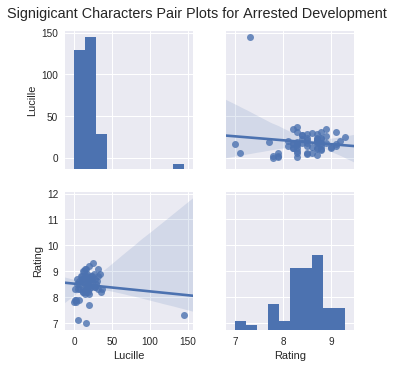

In [0]:
#In the regression table we found 1 character with a statistical significance to the rating: Lucille.

#Lucille compared to rating
lines_Rating = ad[['Lucille', 'Rating']]     

#Regression visual on significant characters vs rating
sns.pairplot(lines_Rating, kind='reg') 
plt.suptitle('Signigicant Characters Pair Plots for Arrested Development', y=1.02)

As we have stated before in the regression table, it was found that one character contributed a negative significance to the rating: Lucille. A pairplot was ran to visualize the slope of the regression line.

### Director Hypothesis Test

Kruskal Wallis H-test test:
('H-statistic:', 21.887258449304007)
('P-Value:', 0.0005500759451766962)
Reject null hypothesis - Significant differences exist between groups.

Director Averages:
Joe Russo: 8.655555555555555
Lee Shallat-Chemel 8.6
Paul Feig 8.5
Mitchell Hurwitz & Troy Miller 7.969999999999999
Troy Miller & Mitchell Hurwitz 7.8199999999999985
Other <5 episodes 8.63225806451613


Text(0.5,0,u'Director')

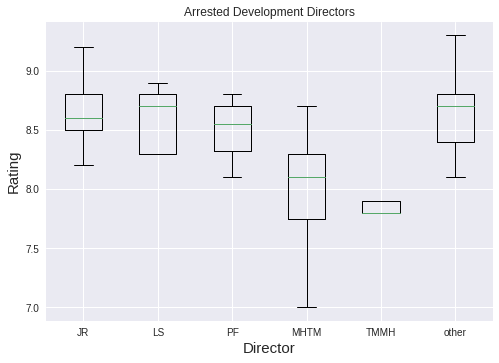

In [0]:
JR = ad.loc[ad['Director'] == "Joe Russo"]
JR = JR['Rating'].values


LS = ad.loc[ad['Director'] == "Lee Shallat-Chemel"]
LS = LS['Rating'].values


PF = ad.loc[ad['Director'] == "Paul Feig"]
PF = PF['Rating'].values


MHTM = ad.loc[ad['Director'] == "Mitchell Hurwitz & Troy Miller"]
MHTM = MHTM['Rating'].values


TMMH = ad.loc[ad['Director'] == "Troy Miller & Mitchell Hurwitz"]
TMMH = TMMH['Rating'].values


other = ad.loc[(ad['Director'] != 'Joe Russo') & (ad['Director'] != 'Lee Shallat-Chemel') 
               & (ad['Director'] != 'Paul Feig') & (ad['Director'] != 'Mitchell Hurwitz & Troy Miller') 
               & (ad['Director'] != 'Troy Miller & Mitchell Hurwitz') ]
other = other['Rating'].values


H, pval = mstats.kruskalwallis(JR, LS, PF, MHTM, TMMH, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")
print ''  
print 'Director Averages:'
print 'Joe Russo:', JR.mean()
print 'Lee Shallat-Chemel', LS.mean()
print 'Paul Feig', PF.mean()
print 'Mitchell Hurwitz & Troy Miller', MHTM.mean()
print 'Troy Miller & Mitchell Hurwitz', TMMH.mean()
print 'Other <5 episodes', other.mean()



import matplotlib.pyplot as plt  
data_to_plot = [JR, LS, PF, MHTM, TMMH, other]
plt.boxplot(data_to_plot)
plt.xticks([1, 2, 3, 4, 5, 6], ['JR', 'LS', 'PF', 'MHTM', 'TMMH', 'other'])
plt.title('Arrested Development Directors')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Director', fontsize=15)


The Kruskal Wallis test is the non-parametric alternative to the One Way ANOVA. Non-parametric means that the test does not assume the data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this hypothesis is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will identify if there is a significant difference between the groups.

The groupings were made in excel on a pivot table. Directors who directed five times or less are grouped as “Other”, with the remaining above five in their own individual group.In this case, we reject the null hypothesis which means our groups are not similar. The data suggests directors do not have an impact on rating.



### Writer Hypothesis Test

In [0]:
BC = ad.loc[ad['Writer'] == "Brad Copeland"]
BC = BC['Rating'].values


MHJV = ad.loc[ad['Writer'] == "Mitchell Hurwitz & Jim Vallely"]
MHJV = MHJV['Rating'].values

other = ad.loc[(ad['Writer'] != 'Brad Copeland') & (ad['Writer'] != 'Mitchell Hurwitz & Jim Vallely')]
other = other['Rating'].values
other

H, pval = mstats.kruskalwallis(BC, MHJV, other)
print("Kruskal Wallis H-test test:")
print("H-statistic:", H)
print("P-Value:", pval)
if pval < 0.05:
    print("Reject null hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Fail to reject null hypothesis")



Kruskal Wallis H-test test:
('H-statistic:', 3.7514262709694464)
('P-Value:', 0.15324564296231596)
Fail to reject null hypothesis


The Kruskal Wallis test is the non-parametric alternative to the One Way ANOVA. Non-parametric means that the test does not assume the data comes from a particular distribution. The H test is used when the assumptions of normality for ANOVA are not met. It is sometimes called the "one-way ANOVA on ranks", as the ranks of the data’s values are used in the test rather than the actual data points.The test determines whether the medians of two or more groups are different. The test statistic used in this hypothesis is called the H statistic. The hypotheses for the test are: H0: population medians are equal and H1: population medians are not equal.
The Kruskal Wallis test will identify if there is a significant difference between the groups.

The groupings were made in excel on a pivot table. Writers who wrote five times or less are grouped as “Other”, with the remaining above five in their own individual group.In this case, we failed to reject the null hypothesis which means our groups are similar. The data suggests writers do have an impact on rating.

### Box and Wisker Plot

Text(0.5,0,u'Character')

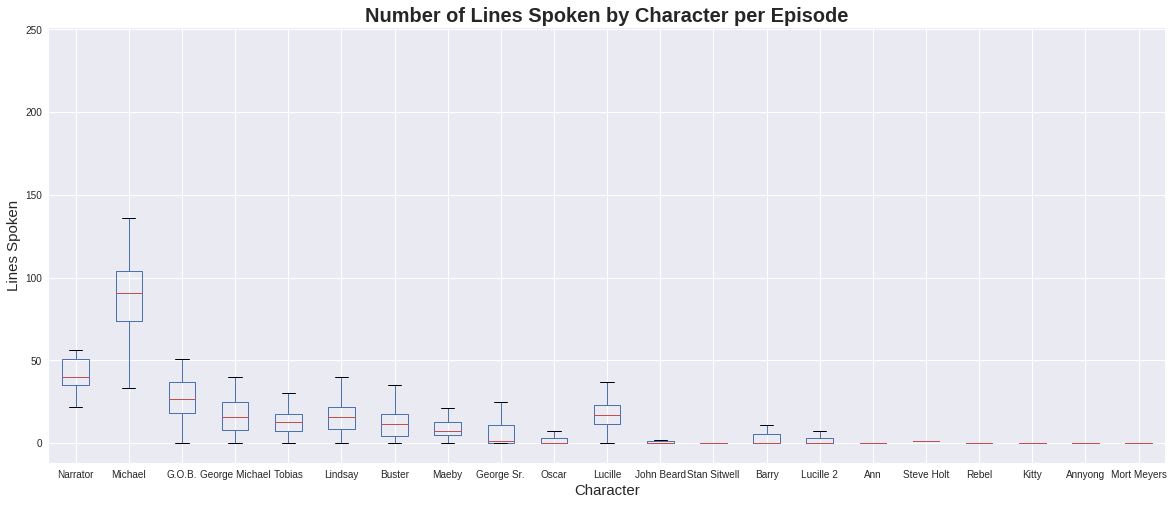

In [0]:
#Box Plot Number of lines spoken by each main character

lines = ad[['Narrator', 'Michael','G.O.B.', 'George Michael', 'Tobias', 'Lindsay',
        'Buster','Maeby', 'George Sr.', 'Oscar', 'Lucille','John Beard',
        'Stan Sitwell', 'Barry', 'Lucille 2','Ann', 'Steve Holt',
        'Rebel','Kitty', 'Annyong', 'Mort Meyers']]

#Plotting graph
lines.boxplot(figsize=(20,8)) 

#Naming the title of the graph, the y-axis, and the x-axis
plt.title('Number of Lines Spoken by Character per Episode',fontsize=20, fontweight='bold')
plt.ylabel('Lines Spoken', fontsize=15)
plt.xlabel('Character', fontsize=15) 

By using a boxplot to visualize the distribution of the number of lines spoken by each character per episode, we can see that the main character Michael spoke the most lines and had the largest  median of around 80 lines per episode. We can also observe that Michael has the largest distribution.

#Time Series

In [4]:
ad.rename(columns={'Original Air Date':'ds',
                          'Rating':'y'}, 
                 inplace=True)
ad.head(3)

,ID,Title,url,Director,Writer,ds,y,Narrator,Michael,G.O.B.,...,Starla,Barry,Lucille 2,Ann,Steve Holt,Rebel,Kitty,Lupe,Annyong,Mort Meyers
0,1_1,Pier Pressure,https://arresteddevelopment.fandom.com/wiki/Tr...,Anthony Russo & Joe Russo,Mitchell Hurwitz,11/2/2003,8.3,25,114,39,...,0,0,1,0,1,0,0,0,0,0
1,1_2,Missing Kitty,https://arresteddevelopment.fandom.com/wiki/Tr...,Anthony Russo,Mitchell Hurwitz & John Levenstein,11/9/2003,8.6,30,94,30,...,0,0,0,0,1,0,20,1,3,0
2,1_3,"My Mother, the Car",https://arresteddevelopment.fandom.com/wiki/Tr...,Joe Russo,Mitchell Hurwitz & Richard Rosenstock,11/16/2003,8.2,25,84,34,...,0,0,12,0,1,0,0,0,0,0


In [0]:
model = Prophet()
model.fit(ad)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
426,2014-05-22
427,2014-05-23
428,2014-05-24
429,2014-05-25
430,2014-05-26


In [0]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
426,2014-05-22,7.741780,7.381323,8.126490
427,2014-05-23,7.852677,7.479323,8.217395
428,2014-05-24,7.881206,7.516841,8.259041
429,2014-05-25,7.997788,7.638886,8.339776
430,2014-05-26,7.770765,7.402636,8.148897


Text(0.5,33,u'Year')

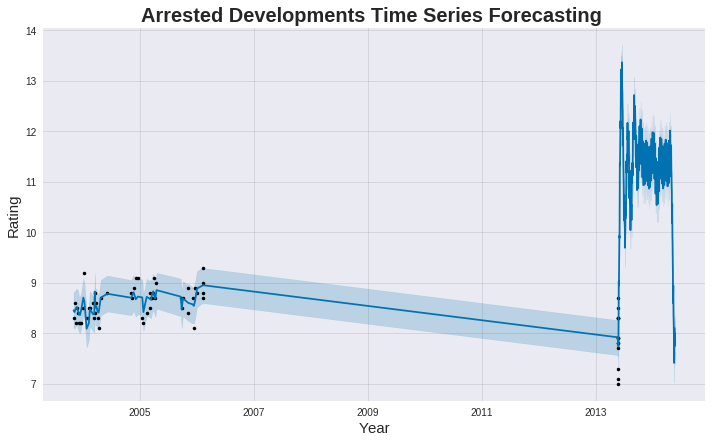

In [0]:
fig1 = model.plot(forecast)
plt.title('Arrested Developments Time Series Forecasting ',fontsize=20, fontweight='bold')
plt.ylabel('Rating', fontsize=15)
plt.xlabel('Year', fontsize=15)

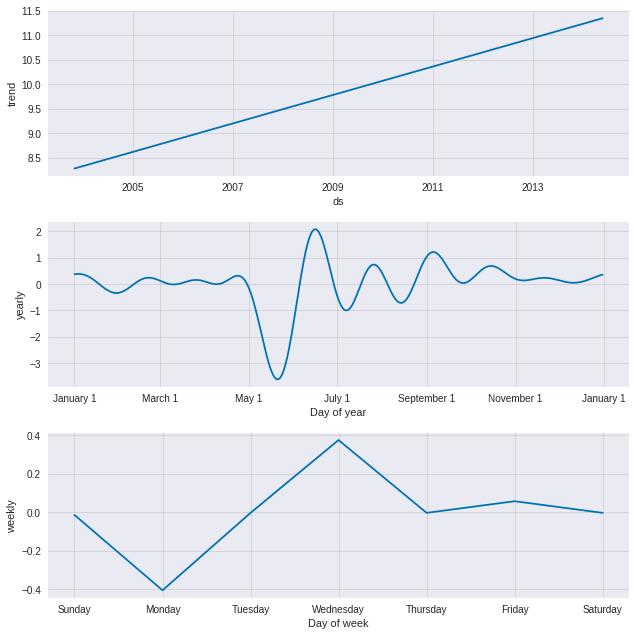

In [0]:
fig2 = model.plot_components(forecast)

Text(0.5,0,u'Episode')

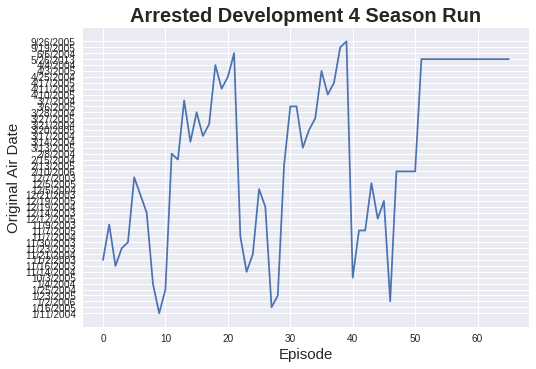

In [0]:

#Checking stationarity of time series
ts = ad['ds']

plt.plot(ts)
plt.title('Arrested Development 4 Season Run',fontsize=20, fontweight='bold')
plt.ylabel('Original Air Date', fontsize=15)
plt.xlabel('Episode', fontsize=15) 

#Forecasting

In [19]:
import sklearn
from sklearn.model_selection import GridSearchCV
df_x = ad.drop(columns = ['ID', 'url','Title', 'ds','y', 'Director', 'Writer'])
df_y = ad['y']

#One Hot Director
dir_one_hot = pd.get_dummies(ad['Director'])
dir_one_hot.columns = dir_one_hot.columns.str.lower()
dir_one_hot.head(1)

#One hot Writer
wir_one_hot = pd.get_dummies(ad['Writer'])
wir_one_hot.columns = wir_one_hot.columns.str.upper()
wir_one_hot.head(1)

# Combines one Hots to Lines Spoken
df_x = df_x.join(dir_one_hot)
df_x = df_x.join(wir_one_hot)
df_x.head(1)

#Seperates Data for training and testing
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_x,df_y,test_size = .3, random_state = 2)
df_x.head(1)

,Narrator,Michael,G.O.B.,George Michael,Tobias,Lindsay,Buster,Maeby,George Sr.,Oscar,...,MITCHELL HURWITZ & CHUCK MARTIN,MITCHELL HURWITZ & CHUCK TATHAM,MITCHELL HURWITZ & JIM VALLELY,MITCHELL HURWITZ & JOHN LEVENSTEIN,MITCHELL HURWITZ & RICHARD DAY,MITCHELL HURWITZ & RICHARD ROSENSTOCK,RICHARD DAY & JIM VALLELY,RICHARD ROSENSTOCK & DEAN LOREY,RON WEINER,TOM SAUNDERS
0,25,114,39,36,0,27,26,16,19,0,...,0,0,0,0,0,0,0,0,0,0


###Linear Regression

In [14]:
from sklearn import linear_model
from sklearn import metrics


param_grid = dict(fit_intercept = ['True', 'False'])


grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.786167 using {'fit_intercept': 'True'}


Score:  -4.169667306847417
Mean Squared Error:  1.0818821256404925
----------------------------------------------------------------


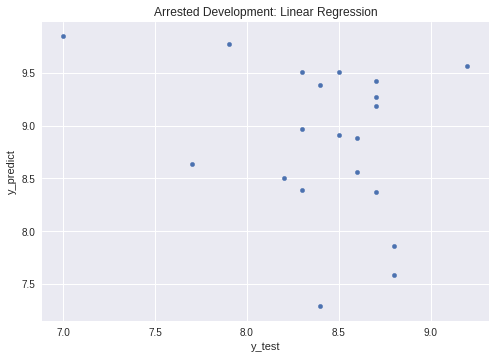

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = 'True')
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Development: Linear Regression')

###K Neighbors

In [12]:
from sklearn import metrics
n_neighbors = range(3,15)
leaf_size = range(25,35)
p=[1,2]

param_grid = dict(n_neighbors=n_neighbors, leaf_size=leaf_size, p=p)


grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.382955 using {'n_neighbors': 12, 'leaf_size': 25, 'p': 2}


Score:  -0.17331329059318623
Mean Squared Error:  0.2455451388888889
----------------------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


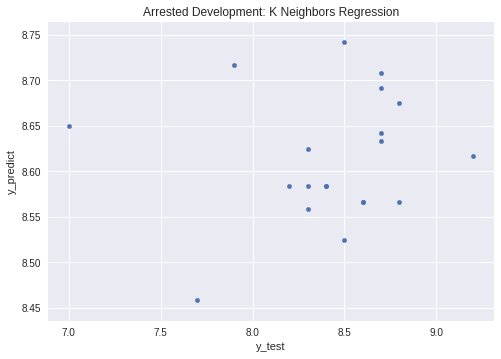

In [13]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=12, leaf_size = 25, p = 2)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Development: K Neighbors Regression')

###Stochastic Gradient Descent Regression

In [17]:
from sklearn import metrics
import numpy


param_grid = dict(loss = [
    'squared_loss',
    'huber',
    'epsilon_insensitive', 
    'squared_epsilon_insensitive'
], max_iter = numpy.arange(100,2000,50))


grid_search = GridSearchCV(linear_model.SGDRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -2.150990 using {'loss': 'huber', 'max_iter': 500}


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Score:  -32.28609915244683
Mean Squared Error:  6.9659484001283065
----------------------------------------------------------------


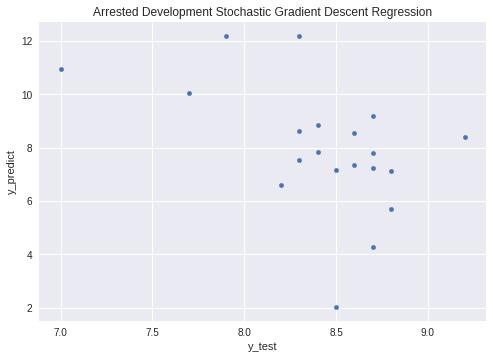

In [18]:
model = linear_model.SGDRegressor(loss = 'huber', max_iter = 500)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Development Stochastic Gradient Descent Regression')

## Decision Tree

In [23]:
from sklearn import metrics
from sklearn import tree

param_grid = dict(max_depth = range(3,79))


grid_search = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.398485 using {'max_depth': 58}


Score:  -0.27105483215864323
Mean Squared Error:  0.2659999999999999
----------------------------------------------------------------


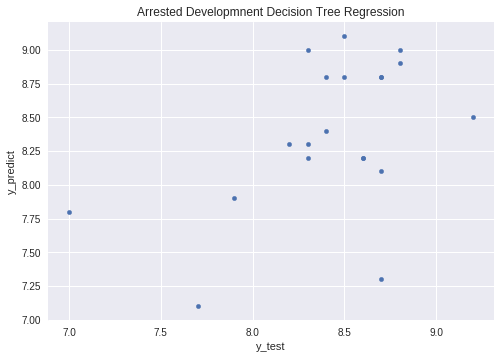

In [24]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 58)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Developmnent Decision Tree Regression')



tree.export_graphviz(model,
out_file='tree.dot') 


from google.colab import files
#files.download('tree.dot')


###Decision Forest

In [26]:
from sklearn import metrics
from sklearn import ensemble
import numpy

param_grid = dict(n_estimators = numpy.arange(5,30,5), max_depth = numpy.arange(3,58) )


grid_search = GridSearchCV(sklearn.ensemble.RandomForestRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.375000 using {'n_estimators': 10, 'max_depth': 45}


Score:  0.3988531836100834
Mean Squared Error:  0.12580499999999972
----------------------------------------------------------------


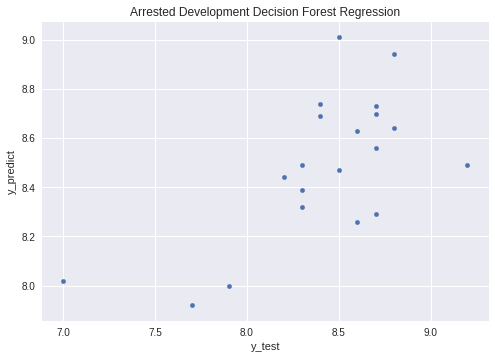

In [27]:
from sklearn import ensemble

  
from sklearn import tree
model = sklearn.ensemble.RandomForestRegressor(n_estimators = 10, max_depth = 45)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '----------------------------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Development Decision Forest Regression')



### Neural Network

In [34]:
from sklearn import metrics
from sklearn import neural_network
import numpy

param_grid = dict(hidden_layer_sizes = numpy.arange(100, 1000, 50),
                 activation = ['identity', 'logistic', 'tanh', 'relu'])


grid_search = GridSearchCV(sklearn.neural_network.MLPRegressor(), param_grid=param_grid,
                          n_jobs = -1, scoring = 'neg_mean_absolute_error')

result = grid_search.fit(df_x, df_y)

print("Best: %f using %s" % (result.best_score_,result.best_params_))

Best: -0.397218 using {'activation': 'logistic', 'hidden_layer_sizes': 150}


Score:  -0.4150897762854766
Mean Squared Error:  0.29614291293214295
-----------------a-----------------------------------------------


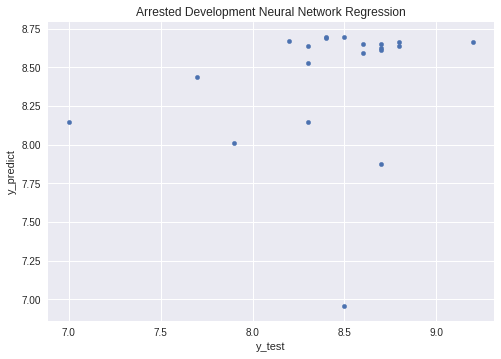

In [35]:
from sklearn import neural_network
model = sklearn.neural_network.MLPRegressor(activation = 'logistic', hidden_layer_sizes = 150)
model.fit(x_train,y_train)
y_predict =  model.predict(x_test)
print 'Score: ' , model.score(x_test,y_test)
print 'Mean Squared Error: ' , sklearn.metrics.mean_squared_error(y_test,y_predict)
print '-----------------a-----------------------------------------------'

y_predict = model.predict(x_test)
results = pd.DataFrame({'y_predict':y_predict, 'y_test':y_test})
results.plot('y_test', 'y_predict', kind='scatter', title = 'Arrested Development Neural Network Regression')